In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
def softmax(x):
    exp = [np.e**(xi) for xi in x]
    return(exp/np.sum(exp))

In [49]:
def gumbel_soft(pi, tau=1):
    n = len(pi)
    g = np.random.gumbel(size=n)
    logit = np.log(pi)
    y = softmax((g+logit)/tau)
    return(y)

In [59]:
def gumbel_bernoulli(p, n, tau=1):
    return([gumbel_soft([p, 1-p], tau)[0] for i in range(n)])

In [92]:
np.linalg.norm(gumbel_bernoulli(.05, 100, .1), ord=1)

5.4968194710290552

In [93]:
np.linalg.norm(gumbel_bernoulli(.05, 100, .1), ord=2)

2.0864124999242351

In [94]:
np.linalg.norm(gumbel_bernoulli(.05, 100, .1), ord=0)

100.0

(array([ 44.,   4.,   3.,   0.,   2.,   1.,   0.,   4.,   6.,  36.]),
 array([  3.05144060e-23,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

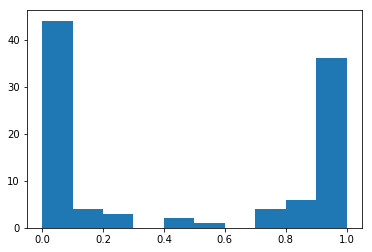

In [98]:
plt.hist(gumbel_bernoulli(.5, 100, .1))

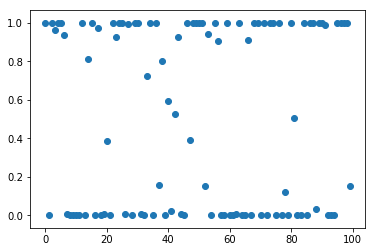

In [97]:
plt.scatter(range(100), gumbel_bernoulli(.5, 100, .1))

In [ ]:
def additive_smoothing(x):
    

In [101]:
def KL_bernoulli(x, p):
    q = np.mean(x)
    kl = -(q*np.log(q/p) + (1-q)*np.log((1-q)/(1-p)))
    return(kl)

In [146]:
n = 100
p = .5
tau = .1
x = gumbel_bernoulli(p, n, tau)
q = np.mean(x)
print(q)
print(KL_bernoulli(x, p))

0.56822591834
-0.00933865844682
